![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datoss
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [ ]:
# Agrupar por estación (season) y calcular las métricas necesarias
resultados_estaciones = bikes.groupby('season')['total'].agg(
    promedio='mean',             # Promedio
    minimo='min',                # Mínimo
    maximo='max',                # Máximo
    desviacion='std',            # Desviación estándar
    percentil_25=lambda x: x.quantile(0.25),  # Percentil 25
    percentil_50=lambda x: x.quantile(0.50),  # Percentil 50 (mediana)
    percentil_75=lambda x: x.quantile(0.75)   # Percentil 75
)

# Mostrar la tabla 
print(resultados_estaciones)

          promedio  minimo  maximo  desviacion  percentil_25  percentil_50  \
season                                                                       
1       116.343261       1     801  125.273974          24.0          78.0   
2       215.251372       1     873  192.007843          49.0         172.0   
3       234.417124       1     977  197.151001          68.0         195.0   
4       198.988296       1     948  177.622409          51.0         161.0   

        percentil_75  
season                
1              164.0  
2              321.0  
3              347.0  
4              294.0  


In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [9]:
# Agrupar por estación (season) y calcular las métricas necesarias
resultados_estaciones = bikes.groupby('hour')['total'].agg(
    promedio='mean',             # Promedio
    minimo='min',                # Mínimo
    maximo='max',                # Máximo
    desviacion='std',            # Desviación estándar
    percentil_25=lambda x: x.quantile(0.25),  # Percentil 25
    percentil_50=lambda x: x.quantile(0.50),  # Percentil 50 (mediana)
    percentil_75=lambda x: x.quantile(0.75)   # Percentil 75
)

# Mostrar la tabla 
print(resultados_estaciones)

        promedio  minimo  maximo  desviacion  percentil_25  percentil_50  \
hour                                                                       
0      55.138462       2     283   43.620012         24.00          41.0   
1      33.859031       1     168   34.112105         11.00          19.0   
2      22.899554       1     119   26.110267          5.00          11.0   
3      11.757506       1      66   12.666442          3.00           6.0   
4       6.407240       1      28    4.217633          3.00           6.0   
5      19.767699       1      57   12.784293          8.00          19.0   
6      76.259341       1     213   54.745333         24.50          75.0   
7     213.116484       1     596  159.207044         63.00         208.0   
8     362.769231       8     839  231.723065        133.50         392.0   
9     221.780220      14     414   92.099209        161.00         217.0   
10    175.092308      17     539  101.807629        106.00         149.0   
11    210.67

## Analisis descriptivo

Para la variable season, se tienen 4 grupos diferentes que hacen referencia a lsa 4 estaciones y se analiza en un primer lugar el promedio, la desviacion estandar, el  minimo y maximo de las bicicletas alquiladas durante las estaciones:
- Se observa que la temporada donde el promedio de alquiler es más bajo, es durante la temporada de invierno, lo que implica que hay menor demanda. Y la temporada con el promedio más alto ocurre durante verano.
- El minimo de las bicicletas alquiladas por hora en todas las estaciones fue de 1, mientras que el maximo de bicicletas alquiladas si difieren entre cada estacion, durante el verano se obtiene  el maximo numero, mientras que en invierno se obtiene el numero más bajo del maximo de bicicletas rentadas, lo cual estaría acorde con la realidad, ya que en invierno hay menor demanda.
- Durante el verano , la desviación estándar es más alta que en las otras estaciones. Esto indica que la cantidad de bicicletas alquiladas es más variable durante esta temporada, lo que puede sugerir que hay más fluctuaciones en la demanda. Podría ser el caso de picos de alta demanda durante días muy cálidos o fines de semana, y períodos de menor demanda entre semana.
-  Se observa que el percentil  50 de la variable de invierno es muchisimo menor que el resto de las temporadas (aproximadamente la mitad),  además, la mediana es cercana al promedio, lo que refuerza la idea de que la demanda es consistente pero baja. Mientras que en  verano, la mediana es muchisimo mas alta, la cual coincide con el promedio elevado de esta temporada.

En el caso de las horas, se observa lo  siguiente:
- En todas las horas del día se observa que hay demanda de alquiler de bicicletas, esto se observa al analizar los promedios de bicicletas rentadas por hora. Durante las horas de la mañana el promedio nos es tan alto, se observa que a las 8am hay un promedio alto y luego se observa otro promedio alto entre las 5 y  6 de la tarde, lo cual podría estar relacionado a las horas de entrada y salidas escolares o laborales.
- Analizando los Minimos y Maximos, se observa que los minimos en la mañana sn bastante bajos comparado con el resto de las horas, entre las 0 y 7am hay un minimo 7 de 1 bicicleta rentada, que, comparado con lsa horas de la tarde, donde se  alcanza  un minimo 23 bicicletas rentadas a las 6pm. Al analizad los máximos, se observan valores altos a las 8am, y entre 5 y 6pm, siendo congruente con el promedio de estas horas, afianzando que durante estas horas hay una mayor demanda de alquiler de bicicletas.
- Por ultimo, analizando los percentiles es posible notar que las 4am es la hora con los percentiles más bajos, y analizando junto al promedio, minimo y máximo, se concluye que a esta hora ocurre la menor demanda de alquiler de bicicletas.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

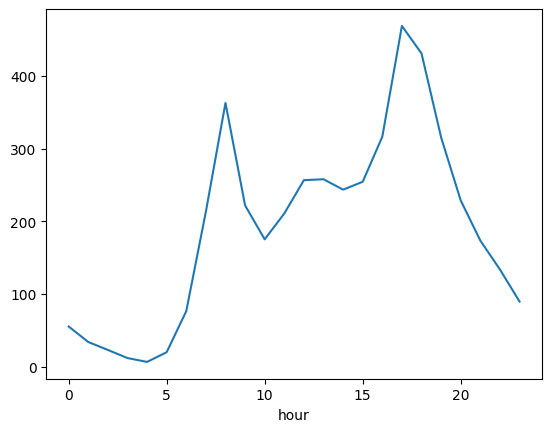

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Promedio de Alquileres por Hora - Invierno (Season 1)'}, xlabel='hour'>

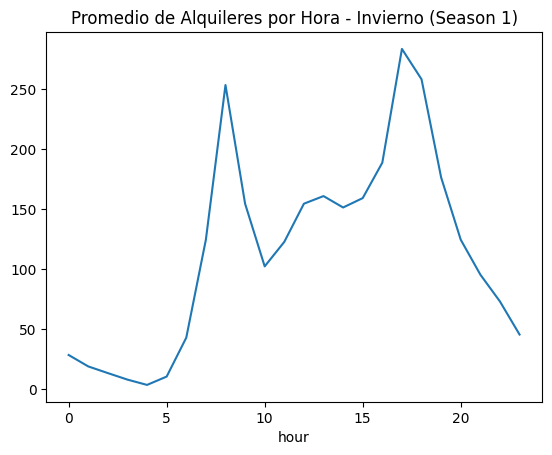

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.loc[bikes['season'] == 1].groupby('hour').total.mean().plot(title='Promedio de Alquileres por Hora - Invierno (Season 1)')


<Axes: title={'center': 'Promedio de Alquileres por Hora - Verano (Season 3)'}, xlabel='hour'>

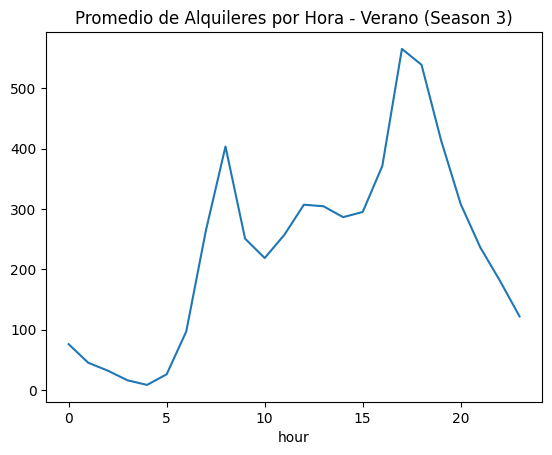

In [13]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.loc[bikes['season'] == 3].groupby('hour').total.mean().plot(title='Promedio de Alquileres por Hora - Verano (Season 3)')

## Analisis de promedio de bicicletas rentadas por hora en Verano e Invierno

- Al analizar los gráficos se observa inicialmente (considerando todas las estaciones), que se alcanzan dos picos bastantes altos a las 8am y 6pm, y que entre las 12am y 5am, el promedio de bicicletas alquiladas decae bastante.
- Luego, al analizar los promedio durante el invierno, se siguen observando los mismos picos a las 8am y 5-6pm, pero con promedios mucho más bajos que el de todas las estaciones en conjunto, durante el invierno se observa que los promedios de las horas pico pueden alcanzar casi 300 bicicletas rentadas en promedio, mientras que si se consideran todas las estaciones este promedio alcanza casi 500 bicicletas rentadas. Esto indica, que se siguen manteniendo las horas picos, pero la demanda durante invierno decae.
- Analizando la temporada de verano, se observan los mismos dos picos que las graficas anteriores, pero con promedios de alquiler de bicicletas mucho más altos, alcanzando aproximadamente más de 550 bicicletas rentadas a las 6pm, siendo muchimos más alto que el promedio durante invierno y el de todas las temporadas.
- Para las 3 gráficas se observa un comportamiento similar, entre las 12am y 5am son las horas de muy baja demanda, a las 8am y 5-6pm se tienen las horas pico más altas, al medio día se observa un pequeño incremento nuevamente del alquiler de bicicletas pero vuelve a bajar, y después de las 6pm la demanda empiezaa a decaer en picada.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [36]:
# Celda 3

# Filtrar las columnas relevantes
# Variables predictoras
X = bikes[['season', 'hour']] 

# Variable respuesta
y = bikes['total']  

# Codificar seaso con OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False) 
season_encoded = encoder.fit_transform(X[['season']])

season_df = pd.DataFrame(season_encoded, columns=encoder.get_feature_names_out(['season']))
X_encoded = pd.concat([season_df, X[['hour']].reset_index(drop=True)], axis=1)

#Separandao  las variables en entrenamiento y prueba
xTrain, xTest, yTrain, yTest = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

#Inicindo el modelo
lr= LinearRegression()

# Realizar la validación cruzada con 5 folds utilizando cross_val_score
scores = cross_val_score(lr, xTrain, yTrain, cv=5, scoring='r2')

# Imprimir las puntuaciones obtenidas en cada fold
print("Puntuaciones R² de cada fold:", scores)

# Puntuación media de R²
print("Puntuación media (R²):", scores.mean())

# Ajustar el modelo con todo el conjunto de entrenamiento (xTrain, yTrain)
lr.fit(xTrain, yTrain)

# Predicción del modelo de regresión lineal
y_pred_lr = lr.predict(xTest)  

rmse_lr = np.sqrt(mean_squared_error(yTest, y_pred_lr))

print(f"RMSE: {rmse_lr}")

# Obtener los coeficientes después de ajustar el modelo
coefficients = pd.DataFrame(lr.coef_, xTrain.columns, columns=["Coeficientes"])

# Imprimir los coeficientes
print(coefficients)



Puntuaciones R² de cada fold: [0.23620205 0.20660991 0.2186271  0.2171507  0.25175796]
Puntuación media (R²): 0.2260695458721068
RMSE: 159.97572650003448
          Coeficientes
season_2     99.758492
season_3    115.078340
season_4     88.918206
hour         10.727042


## Analisis de Modelo de Regresion Lineal

- Como la variable season es una variable categórtica, fue necario transformar esta variable por el metodo de OneHot, creando nuevas columas para cada una de las categorías. Al analizar los coeficientes para estas nuevas variables, se observa que el coeficiente de la Temporada 2 es de 99, lo que indica que, en la primavera se alquilan 99 bicicletas en promedio más que en invierno. Lo mismo ocurre para el verano, se obtiene un coeficiente positivo, lo cual indica que en el verano se alquilan 115 bicicletas más en promedio que durante el Invierno, siendo este el coeficiente más alto.
- En el caso de la variable horas, tambien se tiene un coeficiente positivo, indicando que cada hora de más que se tiene, se aumenta en promedio 10 bicicletas rentadas.

Aunque es posible analizar estos coficientes, al observar la métrica de R-squared, la cual tiene una puntuacion media de 0.22, este valor indica que el modelo no está logrando explicar muy bien la variabilidad de los datos (un R-squared bueno es cercano a 1), y esto se podría deber, a que al considerar un modelo Lineal, este modelo podría no estar captando las diferentes relaciones que hay entre las variables predictoras y la variable de respuesta, las cuales podrían tener relaciones no lineales, ocasionando que el modelo no se ajuste bien a los datos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow, colocnago 6 nodos finales
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

# Ejecución de función tree_predict
tree_predict(X, tree)


array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

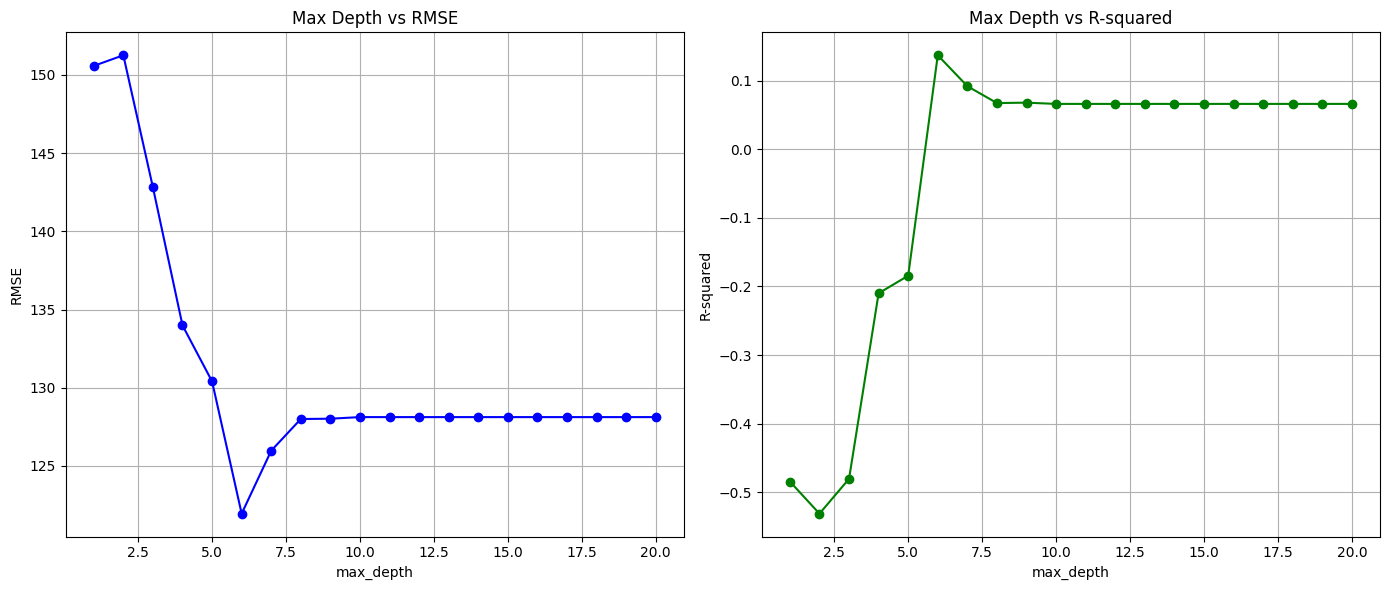

El mejor valor de RMSE es 121.94259382561488 con una profundidad máxima (max_depth) de 6.
El mejor valor de R-squared es 0.1369 con una profundidad máxima (max_depth) de 6.


In [56]:
# Celda 5

# Filtrar las columnas relevantes
# Variables predictoras
X = bikes[['season', 'hour']] 

# Variable respuesta
y = bikes['total'] 

#Separandao  ls variables en entrenamiento y prueba
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores de RMSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []
# Lista para guardar los valores de R-squared para cada valor de máxima profundidad (max_depth)
r2_scores = []

# Rango de valores para max_depth
max_depth_range = range(1, 21)

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la librería sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    
    # Obtener la puntuación RMSE (usando 'neg_root_mean_squared_error' para que los valores sean negativos)
    rmse_scores.append(-cross_val_score(clf, X, y, cv=10, scoring='neg_root_mean_squared_error').mean())
    
    # Obtener la puntuación R-squared
    r2_scores.append(cross_val_score(clf, X, y, cv=10, scoring='r2').mean())

# Crear la figura para mostrar los dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Primer gráfico (RMSE)
axes[0].plot(max_depth_range, rmse_scores, marker='o', color='b', label='RMSE')
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Max Depth vs RMSE')
axes[0].grid(True)

# Segundo gráfico (R-squared)
axes[1].plot(max_depth_range, r2_scores, marker='o', color='g', label='R-squared')
axes[1].set_xlabel('max_depth')
axes[1].set_ylabel('R-squared')
axes[1].set_title('Max Depth vs R-squared')
axes[1].grid(True)

# Ajuste de layout para evitar que los gráficos se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

best_rmse, best_depth = sorted(zip(rmse_scores, max_depth_range))[0]
print(f"El mejor valor de RMSE es {best_rmse} con una profundidad máxima (max_depth) de {best_depth}.")

# Mejor R-squared (desempeño del modelo) y su correspondiente max_depth
best_r2, best_depth = sorted(zip(r2_scores, max_depth_range), reverse=True)[0]
print(f"El mejor valor de R-squared es {best_r2:.4f} con una profundidad máxima (max_depth) de {best_depth}.")

In [63]:
# max_depth=46 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeRegressor(max_depth=6, random_state=1)
clf.fit(xTrain, yTrain)

# Predicción del modelo de arbol de regresion
y_pred_tr = clf.predict(xTest)

#  Calcular el R² y el Error Cuadrático Medio (RMSE)
rmse_tr = np.sqrt(mean_squared_error(yTest, y_pred_tr))
print(f"RMSE: {rmse_tr}")

r2 = r2_score(yTest, y_pred_tr)
print("R² del modelo de Árbol de Decisión:", r2)

RMSE: 118.53437736524162
R² del modelo de Árbol de Decisión: 0.5682153910408011


## Comparacion de Modelo de Regresion lineal vs Arbol de Regresion

- Al momento de conseguir el mejor desempeño del Arbol de decision, se obtiene que el mejor desempeño para las metricas de RMSE Y R-Squared ocurren cuando los nodos finales son 6. Luego, al entrenar el modelo de Arbol de Regresion usando como parametros estos 6 nodos finales, y evaluando el modelo en el conjunto de prueba, se obtiene un RMSE más bajo que el modelo de regresión lineal, lo cual indica que el modelo es mucho mejor que el primero, pero aún así sigue siendo un RMSE bastante alto.
- Por otro lado, al analizar el R-squared, se obtiene que para el modelo de Arbol el R-squared es de 0.56 siendo más alto que el modelo de regresión lineal, esto indica que, el modelo logra explicar mejor la variacion de los datos, pero siguen siendo un modelo bastante pobre.

Conclusion: El Modelo de Arbol de Regresion tiene  mejores métricas  que el modelo de Regresion lineal, pero a pesar de esto, siguen siendo métricas muy pobres que se pueden mejorar teniendo otras consideraciones (considerando más variables, más datos, otros modelos).

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [61]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [64]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [65]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

El mejor valor de ACCURACY es 0.6353333333333333 con una profundidad máxima (max_depth) de 2.


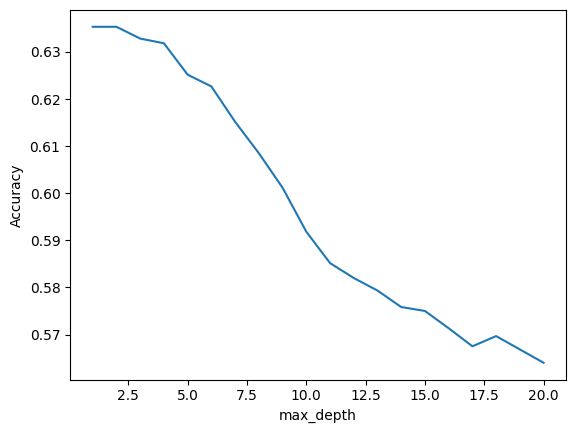

In [69]:
# Celda 6

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf_2 = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf_2, X, y, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus Accuracy (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

best_accuracy, best_depth = sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
print(f"El mejor valor de ACCURACY es {best_accuracy} con una profundidad máxima (max_depth) de {best_depth}.")


In [ ]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf_2 = DecisionTreeClassifier(max_depth=2, random_state=1)
clf_2.fit(X_train, y_train)

# Predicción del modelo de árbol de clasificación
y_pred_dc = clf_2.predict(X_test)

# Calcular el accuracy
accuracy_dc = metrics.accuracy_score(y_test, y_pred_dc)
f1_dc = metrics.f1_score(y_test, y_pred_dc)

# Imprimir el accuracy
print("El Accuracy para el Árbol de clasificación fue de: ", accuracy_dc)
print("El F1_score para el Árbol de clasificación fue de: ", f1_dc)

El Accuracy para el Árbol de clasificación fue de:  0.6453333333333333
El F1_score para el Árbol de clasificación fue de:  0.6448598130841121


In [83]:
# Crear el clasificador de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluar el modelo utilizando accuracy
accuracy_rl = metrics.accuracy_score(y_test, y_pred)
f1_rl = metrics.f1_score(y_test, y_pred)
print(f"El Accuracy para la Regresion Logistica fue de: {accuracy_rl}")
print(f"El F1-score para la Regresion Logistica fue de: {f1_rl}")

El Accuracy para la Regresion Logistica fue de: 0.6126666666666667
El F1-score para la Regresion Logistica fue de: 0.6087542087542087


## Comparacion de Modelos de Arbol de Clasificacion y Regresion Logistica

- Para el modelo de Arbol de Clasificacion se calibró el modelo por medio del Accuracy, analizando para cual cantidad de nodos maximos se obtenía el maximo Accuracy. Después de esto, se entreno el modelo de Arbol de Clasificacion usando esta cantidad de nodos, para así evaluar el modelo y observar su desempeño en el Accuracy y el F1 score.
- Para el modelo de regresion Logistica, solo se llamó el modelo y se entró con los datos de entrenamiento y se evaluó en los datos deprueba, para así  observar su desempeño.

Se observa que para el modelo de Arbol  de Clasificacion se obtiene un Accuracy y un F1-score un poco  más alto que la regresion logistica,  es decir, el modelo de Arbol de Clasificacion está logrando una mayor clasificacion de predicciones correctar en comparcion con las incorrectas. 
Aunque para el Arbol se hayan obtenido unas mejores metricas, siguen siendo valores no muy buenos, por lo cual, será necesario considerr otros modelos o calibrar mejor el modelo, para obtener  mejores metricas.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [131]:
# Celda 7

np.random.seed(42)

#Listas para almacenar los modelos entrenados y sus predicciones
predicciones_dt_max_depth = []
predicciones_dt_min_samples_leaf = []
predicciones_lr = []

# Definir los hiperparámetros para los modelos
max_depth_value = 2 
min_samples_leaf_value = 4  

# Número de muestras bagged
n_estimators = 100

# Creación de las muestras bootstrap (bagging)
n_samples = X_train.shape[0]

# Entrenar 100 Árboles de Decisión con max_depth
for _ in range(n_estimators):
    clf = DecisionTreeClassifier(max_depth=max_depth_value, random_state=1)
    sample_idx = np.random.choice(n_samples, n_samples, replace=True)
    X_resampled, y_resampled = X_train.iloc[sample_idx], y_train.iloc[sample_idx]
    clf.fit(X_resampled, y_resampled)
    predicciones_dt_max_depth.append(clf.predict(X_test))

# Entrenar 100 Árboles de Decisión con min_samples_leaf
for _ in range(n_estimators):
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf_value, random_state=42)
    sample_idx = np.random.choice(n_samples, n_samples, replace=True)
    X_resampled, y_resampled = X_train.iloc[sample_idx], y_train.iloc[sample_idx]
    clf.fit(X_resampled, y_resampled)
    predicciones_dt_min_samples_leaf.append(clf.predict(X_test))

# Entrenar 100 modelos de Reresion  Logistica
for _ in range(n_estimators):
    clf = LogisticRegression()
    sample_idx = np.random.choice(n_samples, n_samples, replace=True)
    X_resampled, y_resampled = X_train.iloc[sample_idx], y_train.iloc[sample_idx]
    clf.fit(X_resampled, y_resampled)
    predicciones_lr.append(clf.predict(X_test))

In [132]:
predicciones_dt_max_depth = np.array(predicciones_dt_max_depth).T  # Forma (n_test_samples, n_estimators)
predicciones_dt_min_samples_leaf = np.array(predicciones_dt_min_samples_leaf).T
predicciones_lr = np.array(predicciones_lr).T

# Votación mayoritaria 
y_pred_dt_max_depth = (predicciones_dt_max_depth.sum(axis=1) >= n_estimators / 2).astype(int)
y_pred_dt_min_samples_leaf = (predicciones_dt_min_samples_leaf.sum(axis=1) >= n_estimators / 2).astype(int)
y_pred_lr = (predicciones_lr.sum(axis=1) >= n_estimators / 2).astype(int)

# Evaluación de los modelos por separado usando Accuracy y F1-Score
accuracy_dt_max_depth = metrics.accuracy_score(y_test, y_pred_dt_max_depth)
f1_dt_max_depth = metrics.f1_score(y_test, y_pred_dt_max_depth)

accuracy_dt_min_samples_leaf = metrics.accuracy_score(y_test, y_pred_dt_min_samples_leaf)
f1_dt_min_samples_leaf = metrics.f1_score(y_test, y_pred_dt_min_samples_leaf)

accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
f1_lr = metrics.f1_score(y_test, y_pred_lr)

print(f"Accuracy Árbol de Decisión con max_depth: {accuracy_dt_max_depth}")
print(f"F1-Score Árbol de Decisión con max_depth: {f1_dt_max_depth}")
print(f"Accuracy Árbol de Decisión con min_samples_leaf: {accuracy_dt_min_samples_leaf}")
print(f"F1-Score Árbol de Decisión con min_samples_leaf: {f1_dt_min_samples_leaf}")
print(f"Accuracy Regresión Logística: {accuracy_lr}")
print(f"F1-Score Regresión Logística: {f1_lr}")

Accuracy Árbol de Decisión con max_depth: 0.6453333333333333
F1-Score Árbol de Decisión con max_depth: 0.6434316353887399
Accuracy Árbol de Decisión con min_samples_leaf: 0.6506666666666666
F1-Score Árbol de Decisión con min_samples_leaf: 0.636615811373093
Accuracy Regresión Logística: 0.6173333333333333
F1-Score Regresión Logística: 0.6121621621621621


In [133]:
# Votación mayoritaria para el ensamble
y_pred_ensemble = (np.concatenate([predicciones_dt_max_depth, 
                                   predicciones_dt_min_samples_leaf, 
                                   predicciones_lr], axis=1).sum(axis=1) >= 1.5 * n_estimators).astype(int)

#Evaluación del desempeño del ensamble
accuracy_ensemble = metrics.accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = metrics.f1_score(y_test, y_pred_ensemble)

print(f"Accuracy Ensamble: {accuracy_ensemble}")
print(f"F1-Score Ensamble: {f1_ensemble}")

Accuracy Ensamble: 0.6286666666666667
F1-Score Ensamble: 0.6177076183939602


### Analisis

Se entrenarion 300 muestras bagged, para un Árbol de Decision con max_depth, otro Árbol con min_samples_leaf y uno de Regresion logistica, el primer y tercer modelo tenían los mismos parametros del punto anterior. Después, se realizó un modelo de ensamblaje con estos 3 modelos, realizando votación mayoritaria para obtener las predicciones finales y los desempeños de cada modelo.

- Al evaluar cada modelo por separado en cada una de sus 100 muestras, se observa que el modelo de Abol por min_samples_leaf obtiene el mejor Accuracy y el F1-score , comparado con los otros dos modelos.
- Al realizar boostrap en el modelo de Arbol de Decisión con max_depth y compararlo con el punto anterior, se observa que las métricas no mejoraron al realizar boostrap.
- Comparando el modelo de Regresion Logistica con el punto anterior,  se observa que se obtuvieron métricas similares, realizar boostrap y luego votacion mayoritaria, no aumentó el desempeño del modelo.
- Por último, al analizar el modelo de ensamblaaje, se obtienen metricas similares a los otros 3 modelos, incluso las métricas son un poco más bajas que el modelo de Arbol de decision por min_samples_leaf. Es posible que estos modelos no sean muy diferentes internamente, por lo cual, no están  logrando aportar información suficiente.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [134]:
# Calculando el Accuracy  de cada modelo
accuracy_dt_max_depth = np.mean([metrics.accuracy_score(y_test, pred) for pred in predicciones_dt_max_depth.T])
accuracy_dt_min_samples_leaf = np.mean([metrics.accuracy_score(y_test, pred) for pred in predicciones_dt_min_samples_leaf.T])
accuracy_lr = np.mean([metrics.accuracy_score(y_test, pred) for pred in predicciones_lr.T])

#Calculando los pesos
alpha = (1 - np.array([accuracy_dt_max_depth, accuracy_dt_min_samples_leaf, accuracy_lr])) 
alpha /= alpha.sum()  #

#Promedio ponderado
weighted_sum = (
    alpha[0] * np.array(predicciones_dt_max_depth).mean(axis=1) + 
    alpha[1] * np.array(predicciones_dt_min_samples_leaf).mean(axis=1) + 
    alpha[2] * np.array(predicciones_lr).mean(axis=1)
)

#Votación ponderada (umbral 0.5)
y_pred = (weighted_sum >= 0.5).astype(int)

#Evaluar la precisión y el F1-Score para la votación ponderada
accuracy_weighted = metrics.accuracy_score(y_test, y_pred)
f1_weighted = metrics.f1_score(y_test, y_pred)

print(f"Votación Ponderada - Accuracy: {accuracy_weighted}")
print(f"Votación Ponderada - F1-Score: {f1_weighted}")

Votación Ponderada - Accuracy: 0.6286666666666667
Votación Ponderada - F1-Score: 0.6182316655243317


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Ambos métodos muestran mejoras sobre algunos de los modelos individuales, lo que confirma que el ensamblaje de modelos podría ser beneficioso. La votación ponderada tiene una ligera ventaja en F1-Score, lo que hace un poco beneficiosa respecto al otro modelo. Sin embargo, la votación mayoritaria sigue siendo una opción más fácil de implementar.

En el caso de la Votaacion Mayoritaria, tiene una desventaja y es que no toma en cuenta el rendimiento individual de cad modelo y los modelos con mas bajo rendimiento pueden afectar los resultados finales. A pesar de esto,  esta calse de ensamblajes son bastante recomendables ya que es  muy sencillo implementarlos y  reduce el sesgo de los modelos individuales al combinar varios predictores.

Por otro lado, se tiene el modelo de votacion ponderada el cual obtuvo un F1-score un poco mayor al modelo de votación mayoritaria, encontrando una mejor precisión entre el recall y el accuracy. Este modelo se destaca porque le asigna un mayor peso a los modelos más confiables y mejora el F1-score de los modelos al reducir el impcto de los modelos menos confiables, pero como se requiere calcular unos pesos adecuados para cada modelo, se vuelve un poco más complejo.